In [21]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img 
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
from keras.utils import plot_model
import pydot
from keras.utils.vis_utils import plot_model
import pydotplus
from PIL import Image
from IPython.display import display

In [2]:
TRAIN_DIR = 'Data/images/train'
TEST_DIR = 'Data/images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
happy completed
neutral completed
sad completed


In [5]:
print(train)

                                   image  label
0          Data/images/train/angry/0.jpg  angry
1          Data/images/train/angry/1.jpg  angry
2         Data/images/train/angry/10.jpg  angry
3      Data/images/train/angry/10002.jpg  angry
4      Data/images/train/angry/10016.jpg  angry
...                                  ...    ...
21072     Data/images/train/sad/9966.jpg    sad
21073     Data/images/train/sad/9974.jpg    sad
21074     Data/images/train/sad/9976.jpg    sad
21075     Data/images/train/sad/9986.jpg    sad
21076     Data/images/train/sad/9997.jpg    sad

[21077 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
happy completed
neutral completed
sad completed


In [7]:
print(test)

                                 image  label
0     Data/images/test/angry/10052.jpg  angry
1     Data/images/test/angry/10065.jpg  angry
2     Data/images/test/angry/10079.jpg  angry
3     Data/images/test/angry/10095.jpg  angry
4     Data/images/test/angry/10121.jpg  angry
...                                ...    ...
5135     Data/images/test/sad/9864.jpg    sad
5136      Data/images/test/sad/987.jpg    sad
5137     Data/images/test/sad/9885.jpg    sad
5138     Data/images/test/sad/9889.jpg    sad
5139     Data/images/test/sad/9923.jpg    sad

[5140 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/21077 [00:00<?, ?it/s]

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/keras/utils/image_utils.py:410: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  'grayscale is deprecated. Please use color_mode = "grayscale"'


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/5140 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 4)
y_test = to_categorical(y_test,num_classes = 4)

In [48]:
# Define the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output before the fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization


# Output layer with 4 classes and softmax activation
model.add(layers.Dense(4, activation='softmax'))

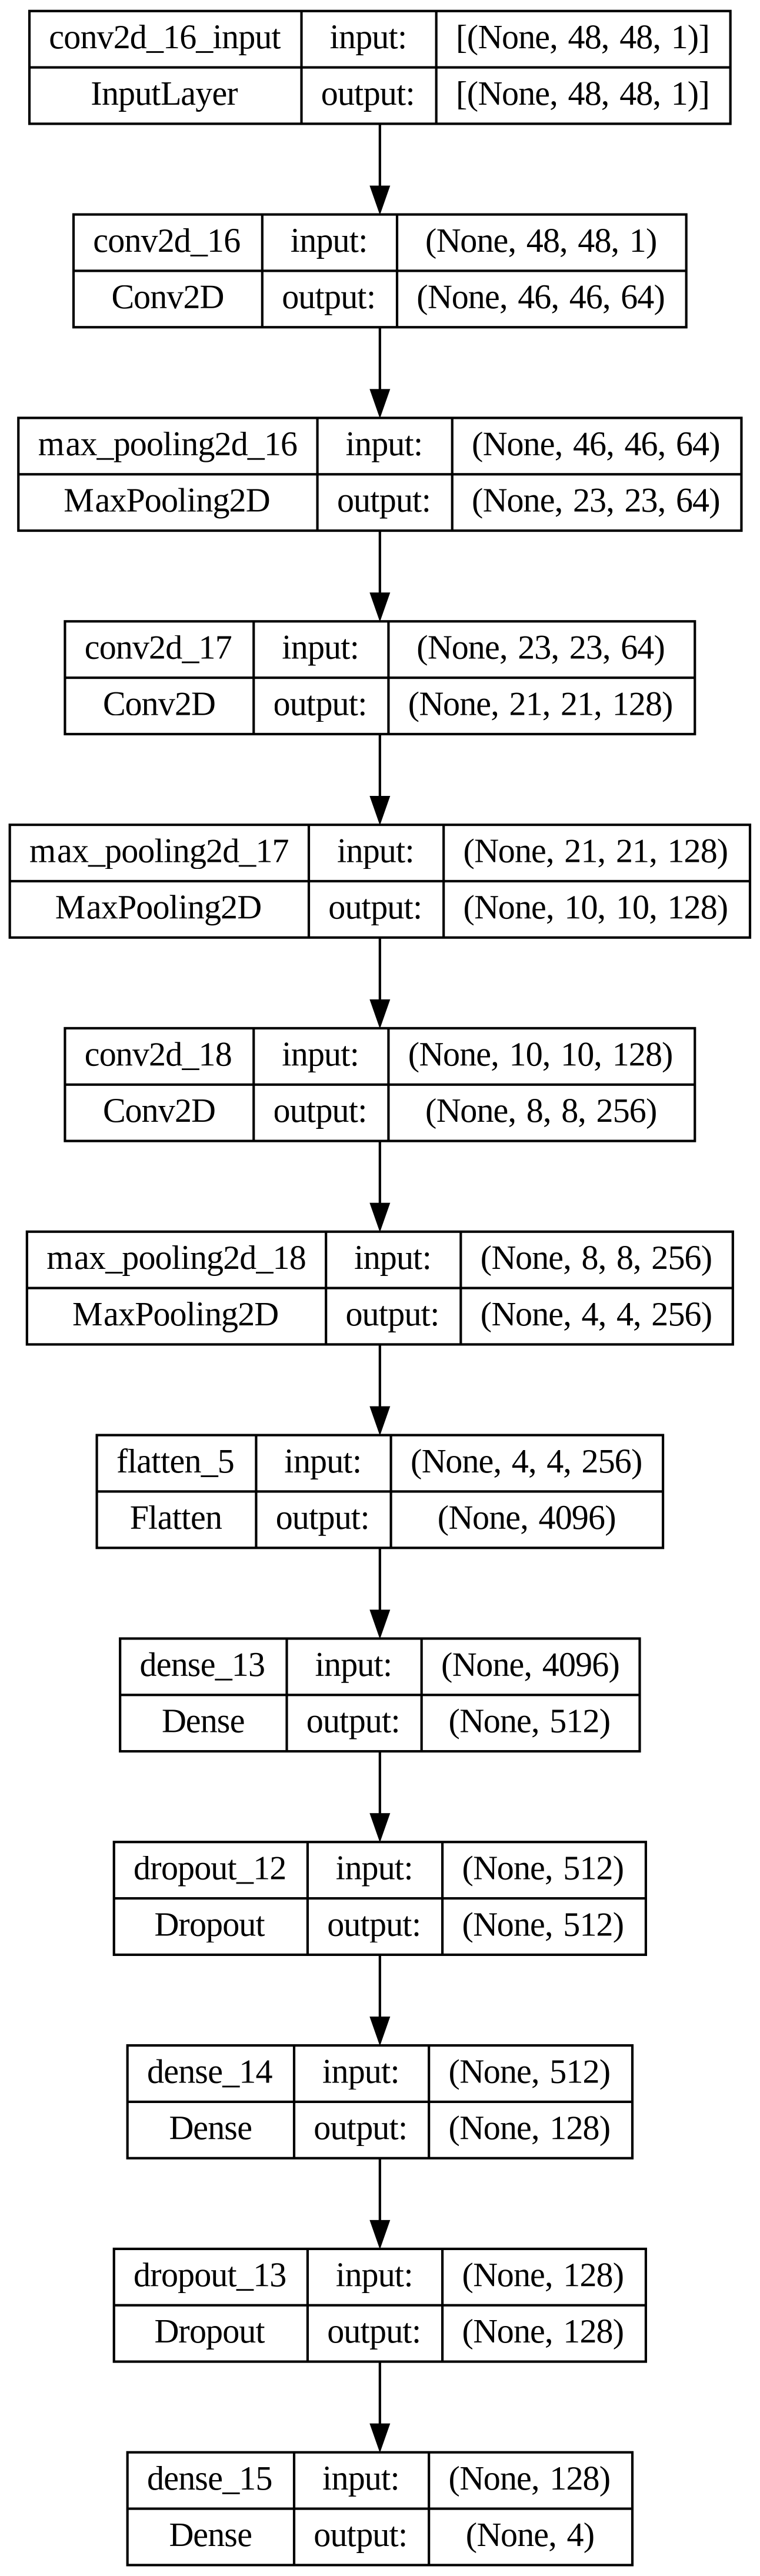

In [49]:
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, expand_nested=True, dpi=300)

In [50]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [51]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test)) 

Epoch 1/50
165/165 [==============================] - 5s 21ms/step - loss: 1.3572 - accuracy: 0.3466 - val_loss: 1.3196 - val_accuracy: 0.3850
Epoch 2/50
165/165 [==============================] - 3s 19ms/step - loss: 1.2011 - accuracy: 0.4589 - val_loss: 1.0658 - val_accuracy: 0.5395
Epoch 3/50
165/165 [==============================] - 3s 19ms/step - loss: 1.0623 - accuracy: 0.5359 - val_loss: 1.0097 - val_accuracy: 0.5609
Epoch 4/50
165/165 [==============================] - 3s 20ms/step - loss: 0.9766 - accuracy: 0.5841 - val_loss: 0.9586 - val_accuracy: 0.5829
Epoch 5/50
165/165 [==============================] - 3s 20ms/step - loss: 0.9206 - accuracy: 0.6129 - val_loss: 0.9137 - val_accuracy: 0.6167
Epoch 6/50
165/165 [==============================] - 3s 20ms/step - loss: 0.8679 - accuracy: 0.6411 - val_loss: 0.8749 - val_accuracy: 0.6298
Epoch 7/50
165/165 [==============================] - 3s 20ms/step - loss: 0.8168 - accuracy: 0.6664 - val_loss: 0.8560 - val_accuracy: 0.6481

In [46]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [47]:
y_pred = model.predict(x_test)
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

f1 = f1_score(y_test_int, y_pred_int, average='weighted') 
classification_rep = classification_report(y_test_int, y_pred_int)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

161/161 [==============================] - 0s 2ms/step
F1 Score: 0.6341992331202587
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55       960
           1       0.87      0.73      0.80      1825
           2       0.56      0.53      0.54      1216
           3       0.48      0.64      0.55      1139

    accuracy                           0.63      5140
   macro avg       0.62      0.61      0.61      5140
weighted avg       0.65      0.63      0.63      5140



In [28]:
model_json = model.to_json()
with open("emotiondetector1.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector1.h5")

In [29]:
from keras.models import model_from_json

In [30]:
json_file = open("emotiondetector1.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector1.h5")

In [31]:
label = ['angry','happy','neutral','sad']

In [32]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 17ms/step
model prediction is  sad


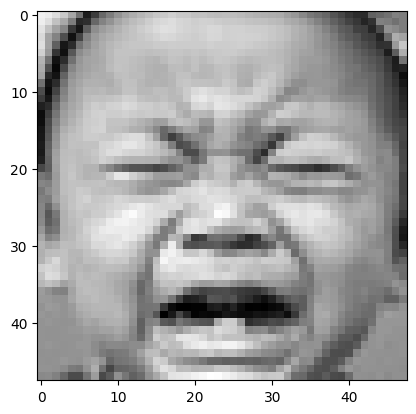

In [ ]:
image = 'Data/images/train/sad/172.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 15ms/step
model prediction is  happy


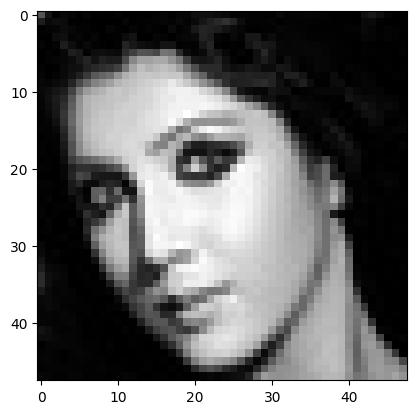

In [ ]:
image = 'Data/images/train/happy/114.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')